<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/01_supervised_learning/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification in Machine Learning

Classification is a type of supervised learning used to predict discrete (categorical) labels or classes.

In this notebook, we will:
- Understand what classification is
- Explore common algorithms
- Build a logistic regression model using scikit-learn
- Evaluate model performance using accuracy, confusion matrix, precision, recall, and F1-score


### **Import Required Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

sns.set(style="whitegrid")

### **Load Dataset**

In [2]:
# Load breast cancer dataset from scikit-learn
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Target names:", data.target_names)
print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Target names: ['malignant' 'benign']
Feature shape: (569, 30)
Target distribution:
 1    357
0    212
Name: count, dtype: int64


### **Visualize Class Distribution**

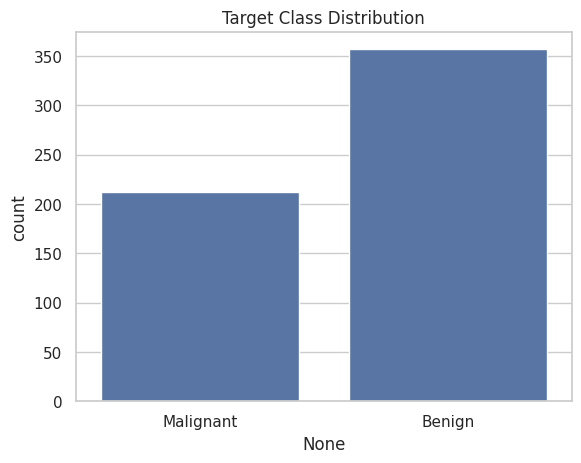

In [3]:
sns.countplot(x=y.map({0: "Malignant", 1: "Benign"}))
plt.title("Target Class Distribution")
plt.show()

### **Train-Test Split**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### **Train a Logistic Regression Model**

In [5]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### **Evaluate the Model**

Accuracy: 0.9649122807017544


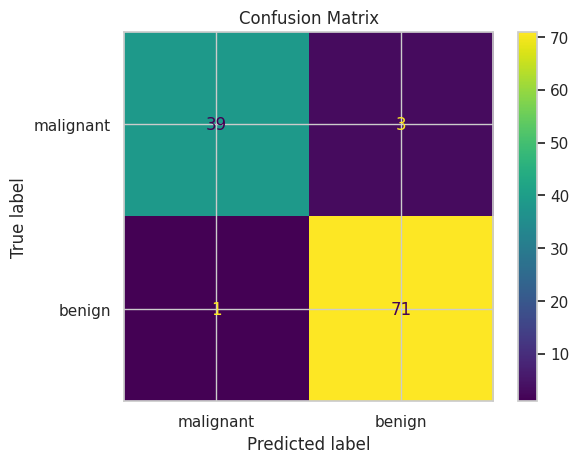

              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot()
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=data.target_names))

### **What Is a Confusion Matrix?**

A confusion matrix shows the number of correct and incorrect predictions broken down by each class.

- True Positives (TP): Correctly predicted positive cases
- True Negatives (TN): Correctly predicted negative cases
- False Positives (FP): Incorrectly predicted as positive
- False Negatives (FN): Incorrectly predicted as negative

These values help compute:
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- F1-score = 2 * (Precision * Recall) / (Precision + Recall)


### **Types of Classification Algorithms**

### Common Classification Algorithms:
1. Logistic Regression (used above)
2. k-Nearest Neighbors (KNN)
3. Decision Trees
4. Random Forests
5. Support Vector Machines (SVM)
6. Naive Bayes
7. Neural Networks (for deep classification tasks)


### **Summary**
- We learned what classification is and why it's used.
- We used logistic regression to classify breast cancer data.
- We evaluated the model using accuracy, precision, recall, and F1-score.

**Next:** Try `model_evaluation.ipynb` to explore advanced evaluation techniques like ROC curves, cross-validation, and AUC.
